In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# 1. Data Loading

In [2]:
# Load DataFrame from the pickle file
trans_df = pd.read_feather('trans_df.feather')

In [3]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9504852 entries, 0 to 9504851
Data columns (total 84 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   Transaction_id                            object 
 1   Last_transaction_time_elapsed_minutes     float64
 2   Hour                                      int32  
 3   Minute                                    int32  
 4   Date                                      object 
 5   Year                                      int32  
 6   Month                                     int32  
 7   Day                                       int32  
 8   Sender_account                            int64  
 9   Receiver_account                          int64  
 10  Amount                                    float64
 11  Amount_USD                                float64
 12  Payment_currency                          object 
 13  Received_currency                         object 
 14  Se

In [3]:
# Load the graph from the pickle file
launder_graph = nx.read_gpickle("launder_graph.pickle")

In [19]:
mask = trans_df['Is_laundering'] == 1
trans_df['Laundering_type'].value_counts()

Laundering_type
Normal_Small_Fan_Out      3477717
Normal_Fan_Out            2302220
Normal_Fan_In             2104285
Normal_Group               528351
Normal_Cash_Withdrawal     305031
Normal_Cash_Deposits       223801
Normal_Periodical          210526
Normal_Plus_Mutual         155041
Normal_Mutual              125335
Normal_Foward               42031
Normal_single_large         20641
Structuring                  1870
Cash_Withdrawal              1334
Deposit-Send                  945
Smurfing                      932
Layered_Fan_In                656
Layered_Fan_Out               529
Stacked Bipartite             506
Behavioural_Change_1          394
Bipartite                     383
Cycle                         382
Fan_In                        364
Gather-Scatter                354
Behavioural_Change_2          345
Scatter-Gather                338
Single_large                  250
Fan_Out                       237
Over-Invoicing                 54
Name: count, dtype: int64

In [18]:
mask = trans_df['Laundering_type'] == 'Cycle'
trans_df[mask]

,Transaction_id,Last_transaction_time_elapsed_minutes,Hour,Minute,Date,Year,Month,Day,Sender_account,Receiver_account,Amount,Amount_USD,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Different_Currency,sender_f_degree_in,sender_f_degree_out,sender_f_amount_in,sender_f_amount_out,sender_f_nr_trans_in,sender_f_nr_trans_out,sender_f_ego_nr_nodes,sender_f_ego_nr_edges,sender_f_average_amount_in,sender_f_average_amount_out,sender_f_ego_edge_density,sender_f_egored_degree_in,sender_f_egored_degree_out,sender_f_egored_amount_in,sender_f_egored_amount_out,sender_f_egored_nr_trans_in,sender_f_egored_nr_trans_out,sender_f_egored_nr_nodes,sender_f_egored_nr_edges,sender_f_egored_average_amount_in,sender_f_egored_average_amount_out,sender_f_egored_edge_density,sender_f_egored_degree_in_rel,sender_f_egored_degree_out_rel,sender_f_egored_amount_in_rel,sender_f_egored_amount_out_rel,sender_f_egored_average_amount_in_rel,sender_f_egored_average_amount_out_rel,sender_f_egored_nr_nodes_rel,sender_f_egored_nr_edges_rel,sender_max_cycle_length,sender_cycle_total_amount_USD,receiver_f_degree_in,receiver_f_degree_out,receiver_f_amount_in,receiver_f_amount_out,receiver_f_nr_trans_in,receiver_f_nr_trans_out,receiver_f_ego_nr_nodes,receiver_f_ego_nr_edges,receiver_f_average_amount_in,receiver_f_average_amount_out,receiver_f_ego_edge_density,receiver_f_egored_degree_in,receiver_f_egored_degree_out,receiver_f_egored_amount_in,receiver_f_egored_amount_out,receiver_f_egored_nr_trans_in,receiver_f_egored_nr_trans_out,receiver_f_egored_nr_nodes,receiver_f_egored_nr_edges,receiver_f_egored_average_amount_in,receiver_f_egored_average_amount_out,receiver_f_egored_edge_density,receiver_f_egored_degree_in_rel,receiver_f_egored_degree_out_rel,receiver_f_egored_amount_in_rel,receiver_f_egored_amount_out_rel,receiver_f_egored_average_amount_in_rel,receiver_f_egored_average_amount_out_rel,receiver_f_egored_nr_nodes_rel,receiver_f_egored_nr_edges_rel,receiver_max_cycle_length,receiver_cycle_total_amount_USD
6282,T171568,0.000000,10,35,2022-10-13,2022,10,13,6088675358,3632421612,17446.238399,22045.066841,UK pounds,UK pounds,UK,UK,ACH,1,Cycle,No,4,11,1.302963e+05,9.341138e+05,19,94,14,15,6857.701739,9937.381212,1.071429,2,2,110033.588004,218769.658380,11,6,3,4,10003.053455,36461.609730,1.333333,0.500000,0.181818,0.844487,0.234200,1.458660,3.669137,0.214286,0.266667,2,38374.756188,15,3,1.727715e+06,4.826636e+05,153,4,18,18,11292.253079,120665.894955,1.000000,1,1,61958.717964,6.165224e+04,2,2,2,2,30979.358982,3.082612e+04,1.000000,0.066667,0.333333,0.035862,0.127733,2.743417,0.255467,0.111111,0.111111,2,123610.962384
59619,T7447178,90675.216667,16,14,2023-06-14,2023,6,14,5857019852,4963856709,28448.409494,35947.410237,UK pounds,UK pounds,UK,UK,ACH,1,Cycle,No,14,5,1.953012e+06,4.267022e+05,142,13,18,19,13753.602385,32823.247307,1.055556,2,2,265270.188924,382623.361848,9,6,3,4,29474.465436,63770.560308,1.333333,0.142857,0.400000,0.135826,0.896699,2.143036,1.942847,0.166667,0.210526,10,548907.887345,17,5,2.482304e+06,5.249634e+05,185,18,22,22,13417.859277,29164.632822,1.000000,1,1,95598.555156,7.259406e+04,4,3,2,2,23899.638789,2.419802e+04,1.000000,0.058824,0.200000,0.038512,0.138284,1.781181,0.829704,0.090909,0.090909,10,548907.887345
62613,T2051408,47187.533333,13,13,2022-12-16,2022,12,16,220205230,2933339739,6414.667832,8105.574272,UK pounds,UK pounds,UK,UK,Cheque,1,Cycle,No,19,4,3.055667e+06,6.103127e+05,202,5,22,23,15127.063518,122062.536287,1.045455,2,2,174499.743704,307053.789120,11,3,3,4,15863.613064,102351.263040,1.333333,0.105263,0.500000,0.057107,0.503109,1.048691,0.838515,0.136364,0.173913,7,56586.370284,12,3,2.052349e+06,4.364592e+05,132,10,16,15,15548.100963,43645.920412,0.937500,0,0,0.000000,0.000000e+00,0,0,1,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,7,56586.370284
70093,T6727366,158377.583333,11,10,2023-05-21,2023,5,21,33

# 2. Tabular EDA

## 2.1 Basic Tabular EDA

## 2.1.1 Frequency of Money Laundering Cases vs Non-Laundering Cases

In [4]:
launder_df = df[['Is_laundering']]
launder_df['Is_laundering'] = launder_df['Is_laundering'].map({0:"No", 1:"Yes"})

C:\Users\jthxc\AppData\Local\Temp\ipykernel_27952\4019956099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  launder_df['Is_laundering'] = launder_df['Is_laundering'].map({0:"No", 1:"Yes"})


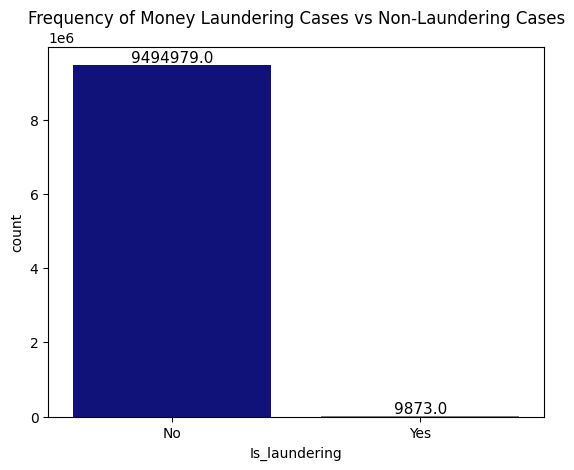

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Is_laundering' column contains 'Yes' and 'No' values

# Set the color palette
colors = {'No': 'darkblue', 'Yes': 'grey'}
plt.title('Frequency of Money Laundering Cases vs Non-Laundering Cases')
# Create the countplot with hue
sns.countplot(data=launder_df, x='Is_laundering', hue='Is_laundering', palette=colors, legend=False)

# Add count labels on top of each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# delete variable to clear memory
del launder_df

### Insights:
- There are only 9873 laundering transactions.
- This dataset fulfill the nature of imbalanced dataset.

## 2.1.2 Frequency of Currency that Involved in Money Laundering

In [7]:
mask = trans_df['Is_laundering'] == 1
launder_df = trans_df[mask][['Payment_currency', 'Received_currency']]
currency = pd.concat([launder_df['Payment_currency'], launder_df['Received_currency']])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


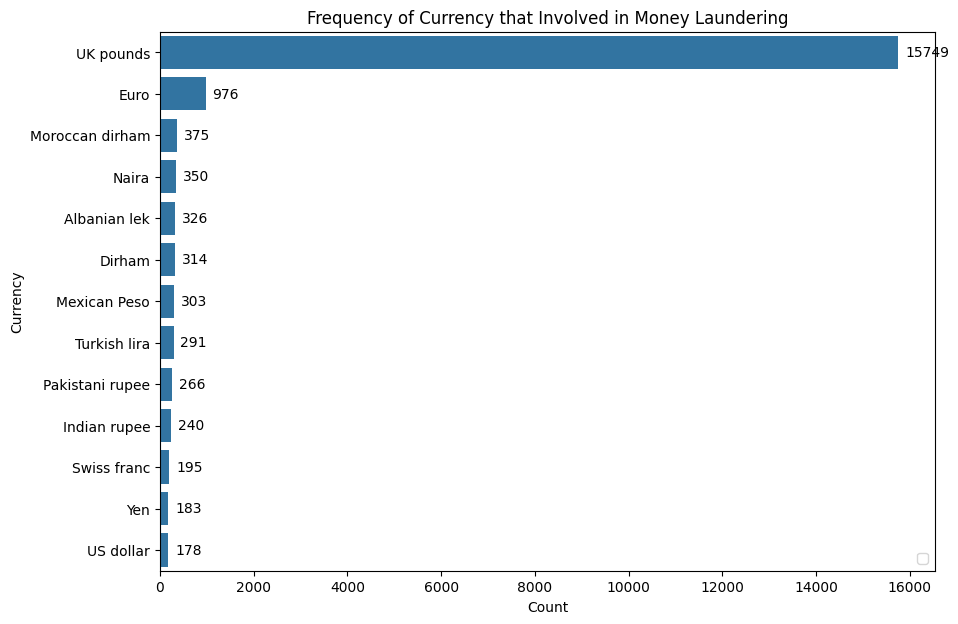

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 7))

# Get the value counts of Payment_currency column and sort them in descending order
currency_counts = currency.value_counts().sort_values(ascending=False).index

# Create the countplot with hue and arrange the values in descending order
sns.countplot(y=currency, order=currency_counts)

# Add count labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Set title and labels
plt.title("Frequency of Currency that Involved in Money Laundering")
plt.xlabel("Count")
plt.ylabel("Currency")

# Move the legend to bottom right
plt.legend(loc='lower right')

# Show plot
plt.show()

del currency

## 2.1.4 Frequency of Money Laundering Cases by Different_Currency

In [20]:
launder_df = df[['Different_Currency', 'Is_laundering']]
launder_df['Is_laundering'] = launder_df['Is_laundering'].map({0:"No", 1:"Yes"})

C:\Users\jthxc\AppData\Local\Temp\ipykernel_27952\2068030383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  launder_df['Is_laundering'] = launder_df['Is_laundering'].map({0:"No", 1:"Yes"})


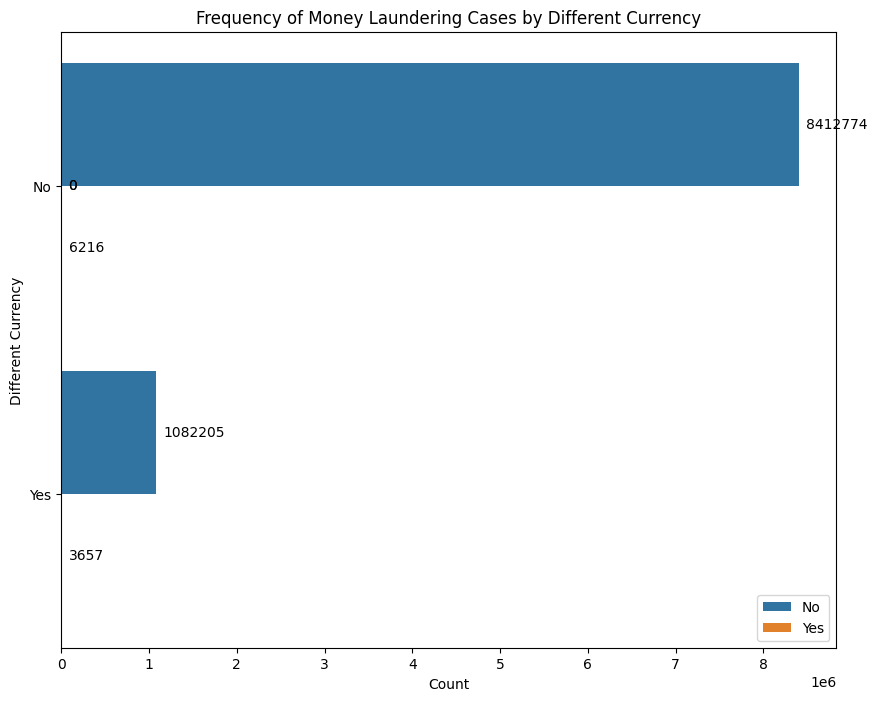

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the countplot with hue
sns.countplot(data=launder_df, y='Different_Currency', hue='Is_laundering')

# Add count labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center', fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')

# Set title and labels
plt.title("Frequency of Money Laundering Cases by Different Currency")
plt.xlabel("Count")
plt.ylabel("Different Currency")

# Move the legend to bottom right
plt.legend(loc='lower right')

# Show plot
plt.show()

# 3. Graph Analytics

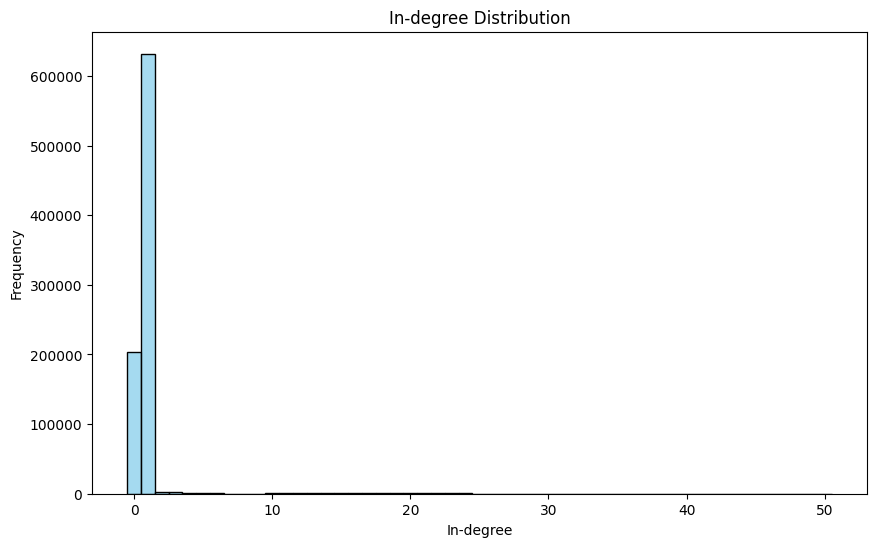

In [55]:
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'launder_graph' is your graph object

# Get the in-degree distribution
in_degrees = dict(launder_graph.in_degree())
degree_values = list(in_degrees.values())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, discrete=True, color='skyblue', bins=len(set(degree_values)))
plt.title("In-degree Distribution")
plt.xlabel("In-degree")
plt.ylabel("Frequency")
plt.show()


In [40]:
mask = df['Is_laundering'] == 1
df[mask]['Sender_account'].value_counts()

Sender_account
4159678387    37
9710838491    31
4503049074    30
9330449479    29
3990750333    28
              ..
8971216490     1
3864540269     1
30747439       1
3930067303     1
7929569569     1
Name: count, Length: 4950, dtype: int64

In [43]:
mask = df['Sender_account'] == 4159678387
df[mask]

,Transaction_id,Time,Hour,Minute,Date,Year,Month,Day,Sender_account,Receiver_account,Amount,Amount_USD,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Different_Currency
1190807,T1190808,21:45:50,21,45,2022-11-16,2022,11,16,4159678387,3757426467,223.62,282.566232,UK pounds,UK pounds,UK,UK,Cash Withdrawal,0,Normal_Cash_Withdrawal,No
2780268,T2780269,12:35:15,12,35,2023-01-10,2023,1,10,4159678387,270405806,74.27,93.847572,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2782920,T2782921,14:17:03,14,17,2023-01-10,2023,1,10,4159678387,270405806,211.88,267.731568,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2823169,T2823170,21:48:02,21,48,2023-01-11,2023,1,11,4159678387,270405806,206.61,261.072396,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2825004,T2825005,22:56:14,22,56,2023-01-11,2023,1,11,4159678387,270405806,252.15,318.616740,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2847449,T2847450,17:47:55,17,47,2023-01-12,2023,1,12,4159678387,270405806,222.74,281.454264,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2851802,T2851803,20:24:11,20,24,2023-01-12,2023,1,12,4159678387,270405806,222.54,281.201544,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2868453,T2868454,12:20:15,12,20,2023-01-13,2023,1,13,4159678387,270405806,272.55,344.394180,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2887662,T2887663,23:34:34,23,34,2023-01-13,2023,1,13,4159678387,270405806,111.65,141.080940,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No
2899956,T2899957,12:58:39,12,58,2023-01-14,2023,1,14,4159678387,270405806,310.58,392.448888,UK pounds,UK pounds,UK,UK,Cash Withdrawal,1,Cash_Withdrawal,No


In [33]:
df.head()

,Transaction_id,Time,Hour,Minute,Date,Year,Month,Day,Sender_account,Receiver_account,Amount,Amount_USD,Payment_currency,Received_currency,Sender_bank_location,Receiver_bank_location,Payment_type,Is_laundering,Laundering_type,Different_Currency
0,T1,10:35:19,10,35,2022-10-07,2022,10,7,8724731955,2769355426,1459.15,1843.781940,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,No
1,T2,10:35:20,10,35,2022-10-07,2022,10,7,1491989064,8401255335,6019.64,7606.417104,UK pounds,Dirham,UK,UAE,Cross-border,0,Normal_Fan_Out,Yes
2,T3,10:35:20,10,35,2022-10-07,2022,10,7,287305149,4404767002,14328.44,18105.416784,UK pounds,UK pounds,UK,UK,Cheque,0,Normal_Small_Fan_Out,No
3,T4,10:35:21,10,35,2022-10-07,2022,10,7,5376652437,9600420220,11895.00,15030.522000,UK pounds,UK pounds,UK,UK,ACH,0,Normal_Fan_In,No
4,T5,10:35:21,10,35,2022-10-07,2022,10,7,9614186178,3803336972,115.25,145.629900,UK pounds,UK pounds,UK,UK,Cash Deposit,0,Normal_Cash_Deposits,No


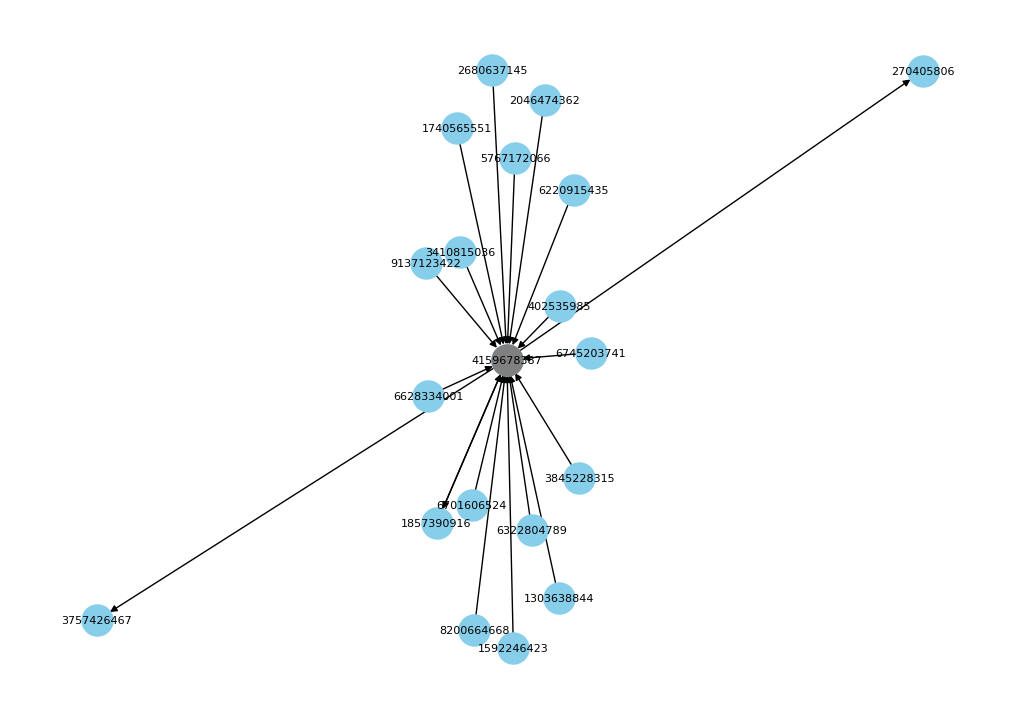

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

import networkx as nx
import matplotlib.pyplot as plt

def plot_subgraph_around_node(graph, target_node, radius):
    """
    Plot a subgraph around a target node within a given radius.

    Parameters:
        graph (nx.Graph): The graph containing the nodes and edges.
        target_node: The node around which the subgraph will be plotted.
        radius (int): The radius of the subgraph, indicating the number of hops away from the target node.
    """
    # Get neighbors in the first hop
    first_hop_neighbors = set(nx.all_neighbors(graph, target_node))
    
    # Get neighbors in the subsequent hops up to the specified radius
    neighbors = set(first_hop_neighbors).union({target_node})

    if radius > 1:
        for _ in range(radius-1):
            next_hop_neighbors = set()
            for node in neighbors:
                next_hop_neighbors.update(nx.all_neighbors(graph, node))
            neighbors.update(next_hop_neighbors)

    subgraph = graph.subgraph(neighbors)

    plt.figure(figsize=(10, 7))
    # Draw the subgraph
    pos = nx.spring_layout(subgraph)  # You can choose a different layout if needed
    nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8)

    # Highlight the target node
    nx.draw_networkx_nodes(subgraph, pos, nodelist=[target_node], node_size=500, node_color='grey')

    # Show the plot
    plt.show()

# Example usage:

target_node = 4159678387
radius = 1

# Plot the subgraph around the target node with the given radius
plot_subgraph_around_node(launder_graph, target_node, radius)
